In [5]:
#<editor-fold desc="Imports">
import fastf1 as ff1
import fastf1.plotting
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from rich.console import Console
from rich.table import Table
from rich import box
from rich.style import Style
#</editor-fold>

#<editor-fold desc="Set Ups">
#ff1.Cache.enable_cache('Cache/')
pd.options.mode.chained_assignment = None
fastf1.plotting.setup_mpl()

console = Console(highlight = False)
mainStyle = Style(color = "yellow")
#</editor-fold>

#Colour Codes For The Tyres
tyreColorCodes = {"SOFT": 'red', "MEDIUM": 'yellow', "HARD": 'white', "INTERMEDIATE": 'green', "WET": 'blue'}

def AllStintsTyrePerformance(driver, year, race, session, verbose):
    #Gets The Laps From The Inputted Race Info
    F1Session = ff1.get_session(year, race, session,)
    F1Session.load(telemetry=True, laps = True, weather = True)
    laps = F1Session.laps

    #Picks The Accurate Laps That Aren't In Or Out Laps From The Inputted Driver
    driverLaps = laps.pick_wo_box()

    #Creates A Dataframe For The Drivers Lap Info
    lapInfo = pd.DataFrame(columns=['Lap', 'Stint', 'Compound', 'Life', 'Fresh', 'LapTime'])

    fastestTimePerLap = {}
    fastestDriverPerLap = {}

    # Creates A Table To Output The Results
    outputTable = Table(title="Tyre Lap Info", box=box.SIMPLE, title_style=mainStyle)
    # Adds The Columns
    outputTable.add_column("Lap", justify="center")
    outputTable.add_column("Stint", justify="center")
    outputTable.add_column("Compound", justify="center")
    outputTable.add_column("Life", justify="center")
    outputTable.add_column("Fresh", justify="center")
    outputTable.add_column("Lap Time", justify="center")
    outputTable.add_column("Delta", justify="center")

    #If Verbose Was Passed In As A Parameter
    if verbose:
        outputTable.add_column("Fast Lap Time", justify="center")
        outputTable.add_column("Fast Lap Driver", justify="center")

        #Creates The Graph Info
        fig, ax = plt.subplots()
        graphInfo = pd.DataFrame(columns=['Lap', 'Driver', 'FastestLap'])

    #Loops Through Every Lap In The Race
    for index, row in driverLaps.iterlaps():
        if row['Driver'] == driver:
            #Adds The Info To The DataFrame
            x = {'Lap': row['LapNumber'], 'Stint': row['Stint'], 'Compound': row['Compound'], 
                 'Life': row['TyreLife'], 'Fresh': row['FreshTyre'], 'LapTime': row['LapTime']}
            a = pd.DataFrame(x, index=[0])
            lapInfo = pd.concat([lapInfo,a])
        else:
            if row['LapNumber'] not in fastestTimePerLap:
                fastestTimePerLap[row['LapNumber']] = row['LapTime']
                fastestDriverPerLap[row['LapNumber']] = row['Driver']
            else:
                if row['LapTime'] < fastestTimePerLap[row['LapNumber']]:
                    fastestTimePerLap[row['LapNumber']] = row['LapTime']
                    fastestDriverPerLap[row['LapNumber']] = row['Driver']


    #Add's The Fastest Lap Times To The Table
    for index, row in lapInfo.iterrows():
        #Get The Tyres Colour
        colourCodedCompound = "[" + tyreColorCodes[row['Compound']] + "]" + row['Compound'] + "[/" + tyreColorCodes[row['Compound']] + "]"

        #Re-Configures The Lap Time
        driverLapTime = datetime.timedelta(seconds=row['LapTime'].seconds, microseconds=row['LapTime'].microseconds)

        #Re-Configures The Fastest Lap Time
        fastestLapTime = datetime.timedelta(seconds=fastestTimePerLap[row['Lap']].seconds, microseconds=fastestTimePerLap[row['Lap']].microseconds)

        #Colours The Lap Delta
        if driverLapTime < fastestLapTime:
            colouredDelta = "[green]" + str(fastestLapTime - driverLapTime) + "[/green]"
        else:
            colouredDelta = "[red]" + str(driverLapTime - fastestLapTime) + "[/red]"

        #If Verbose Was Passed In As A Parameter
        if verbose:
            #Adds The Info To The Table
            outputTable.add_row(str(int(row['Lap'])), str(int(row['Stint'])), colourCodedCompound, str(row['Life']), str(row['Fresh']), str(driverLapTime), colouredDelta, str(fastestLapTime), fastestDriverPerLap[row['Lap']])
            y = {'Lap': row['Lap'], 'Driver': driverLapTime, 'FastestLap': fastestLapTime}
            b = pd.DataFrame(y, index=[0])
            graphInfo = pd.concat([graphInfo,b])
        else:
            # Adds The Info To The Table
            outputTable.add_row(str(int(row['Lap'])), str(int(row['Stint'])), colourCodedCompound, str(row['Life']), str(row['Fresh']), str(driverLapTime), colouredDelta)

    #Print Out The Table
    console.print(outputTable)

    # If Verbose Was Passed In As A Parameter
    if verbose:
        ax.plot(graphInfo['Lap'], graphInfo['Driver'], label = driver)
        ax.plot(graphInfo['Lap'], graphInfo['FastestLap'], label = 'Fastest Time')

        ax.set_xlabel("Lap Number")
        ax.set_ylabel("Lap Time")

        ax.legend()
        plt.suptitle("Driver Tyre Performance Delta")
        plt.show()

core           INFO 	Loading data for Bahrain Grand Prix - Qualifying [v3.1.5]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info


req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['16', '5', '44', '77', '33', '20', '55', '8', '7', '4', '3', '23', '10', '11', '26', '99', '27', '18', '63', '88']


                                                Tyre Lap Info                                                 
                                                                                                              
  Lap   Stint   Compound   Life   Fresh      Lap Time          Delta        Fast Lap Time    Fast Lap Driver  
 ──────────────────────────────────────────────────────────────────────────────────────────────────────────── 
   2      1       SOFT     2.0    True    0:01:29.498000   0:00:01.003000   0:01:28.495000         LEC        
   3      1       SOFT     3.0    True    0:01:57.907000   0:00:03.100000   0:01:54.807000         LEC        
   4      1       SOFT     4.0    True    0:01:56.652000   0:00:24.853000   0:01:31.799000         KUB        
   7      2       SOFT     2.0    True    0:01:28.830000   0:00:00.482000   0:01:29.312000         SAI        
  11      4       SOFT     2.0    True    0:01:28.335000   0:00:00.145000   0:01:28.190000         HAM        
  14      5       SOFT     2.0    True    0:01:28.256000   0:00:00.194000   0:01:28.450000         HAM

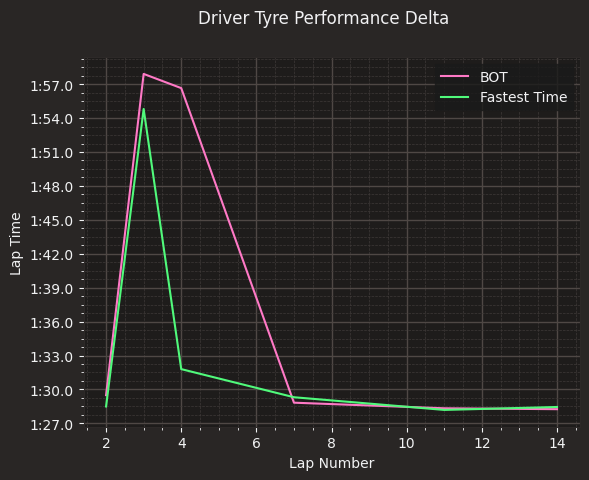

In [6]:
AllStintsTyrePerformance('BOT', 2019, 'Bahrain', 'Q', True)